# Apa itu Clustering dan Algoritma K-Prototypes

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa di lakukan dengan menggunakan library k-modes yang di dalamnya terdapat modul kprototype.

Untuk menggunakan algoritma kprototype kamu perlu memasukkan jumlah cluster yang di kehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.

Untuk lebih lengkapnya kamu bisa melihat dokumentasi dari kprototype melalui link berikut https://github.com/nicodv/kmodes

# Tips

Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan model nya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.

Tantangan lainnya adalah jumlah data yang jauh lebih banyak di banding dengan data set yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan model nya akan menjadi lebih lama.

# 1 - Exploratory Data Analysis

## A. Mempersiapkan Library dan Data


    1. Pandas, di gunakan untuk melakukan pemrosesan analisis data
    2. Matplotlib, di gunakan sebagai dasar untuk melakukan visualisasi data
    3. Seaborn, di gunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
    4. Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
    5. kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
    6. Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.



In [1]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
#from pathlib import Path 

## B. Read Dataset
Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

    1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
    2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
    3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
    4. Umur: Umur dari pelanggan dalam format angka
    5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
    6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
    7. Nilai Belanja Setahun: Merupakan total belanja yang sudah di keluarkan oleh pelanggan tersebut.

In [3]:
# import dataset  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")

# menampilkan data
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


## C. Melihat Informasi dari Data

In [4]:
# Menampilkan informasi data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

    1. Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
    2. Tidak ada nilai Null padat data
    3. Dua kolom memiliki tipe data numeric dan lima data bertipe string


## D. Eksplorasi Data Numerik
Pertama kamu perlu melihat distribusi data dari data yang berjenis numerik. Disini kamu akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

<Figure size 432x288 with 0 Axes>

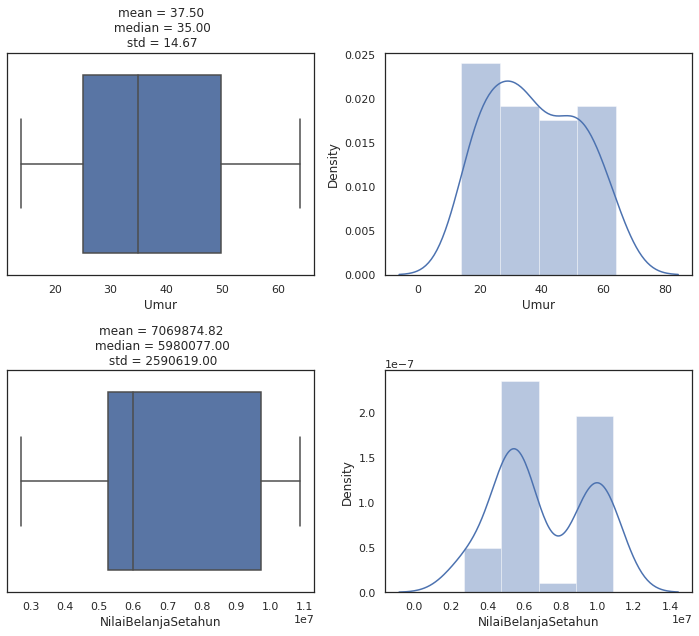

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, ax = plt.subplots(2, 2, figsize=(10, 9)) #Membuat subplot 2x2
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = ax[i][0]) #ax[baris][kolom]
	    sns.distplot(df[kol], ax = ax[i][1]) 
	    ax[i][0].set_title('mean = {:.2f}\n median = {:.2f}\n std = {:.2f}'.format(df[kol].mean(), df[kol].median(), df[kol].std()))
    #plt.setp(axs)
    plt.tight_layout()
    plt.show()
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik)

## E. Eksplorasi Data Kategorikal
Selain data numerikal, kamu juga perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen.

Index(['Cluster', 'Sector'], dtype='object')


<Figure size 432x288 with 0 Axes>

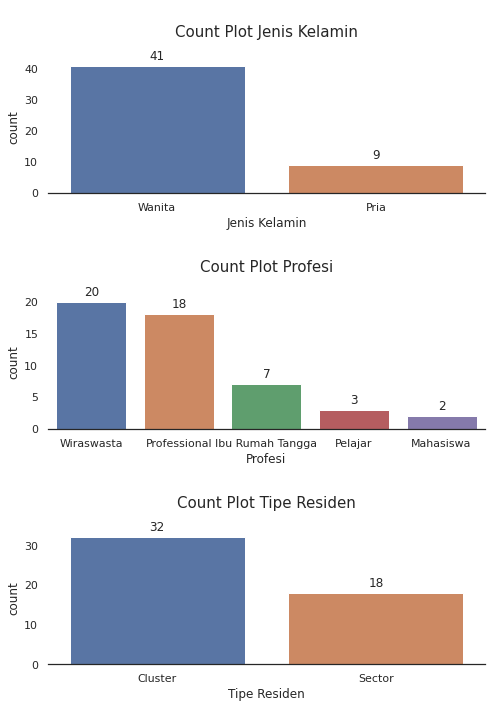

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
print(df['Tipe Residen'].value_counts().index)

# Membuat canvas
fig, ax = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    
    # Membuat Plot
      #order = .value_counts().index -> urutkan label berdasarkan jumlah count
    sns.countplot(x=kol, data=df, order = df[kol].value_counts().index, ax = ax[i])
    ax[i].set_title('\nCount Plot {}\n'.format(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in ax[i].patches:  
        ax[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')

    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  #Remove Border Grafik
    #ax[i].axes.yaxis.set_visible(False) 
    #plt.setp(ax)
    plt.tight_layout()

# Tampilkan plot
plt.show()

# 2 - Data Pre-processing

## A. Standarisasi Kolom Numerik
Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kamu perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat di lakukan dengan melakukan standardisasi data yang kamu miliki. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan di bentuk dan juga tiap variabel akan di anggap sama pentingnya oleh algoritma yang akan di gunakan.

In [7]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

print('\nStatistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0

Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


Standard Scaler akan membuat mean : 0  dan std : 1

In [8]:
# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print('MEAN : \n{}'.format(df_std.mean()))
print('\nSTD : \n{}\n'.format(df_std.std()))
df_std.head()

Contoh hasil standardisasi

MEAN : 
Umur                   4.440892e-18
NilaiBelanjaSetahun   -1.199041e-16
dtype: float64

STD : 
Umur                   1.010153
NilaiBelanjaSetahun    1.010153
dtype: float64



,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421


## B. Konversi Kategorikal Data dengan Label Encoder
Ubahlah kolom-kolom kategorikal pada data set kamu menjadi numerik menggunakan LabelEncoder dari sklearn

In [9]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
  LE = LabelEncoder()
  df_encode[col] = LE.fit_transform(df_encode[col])
  
  # Print Label String
  print(LE.classes_) #cek pelabelan -> Misal Ibu Rumah Tangga : 0, Wiraswasta : 4, etc

# Menampilkan data
df_encode.head()

['Pria' 'Wanita']
['Ibu Rumah Tangga' 'Mahasiswa' 'Pelajar' 'Professional' 'Wiraswasta']
['Cluster' 'Sector']


,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


## C. Menggabungkan Data untuk Permodelan
Gabungkan kedua data frame df_std dan df_encode yang sudah di buat di tahap sebelumnya menjadi df_model.

In [10]:
# Menggabungkan data frame
#df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_model = pd.concat([df_encode, df_std], axis=1)
df_model.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


# 3 - Create Clustering Model (K-Prototypes)


## A. Mencari Jumlah Cluster (Centroid) yang Optimal
Salah satu parameter penting yang harus di masukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunnakan bantuan 'elbow plot'.

Elbow plot ini dapat di buat dengan cara  memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

In [11]:
import pandas as pd
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')
df_model.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


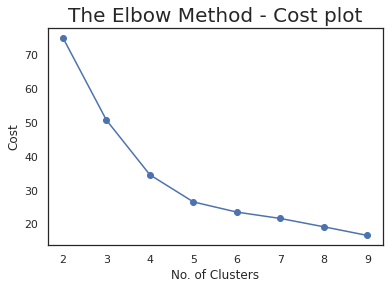

In [12]:
#import library
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#Elbow Method - Inertia plot
cost = []
#looping the inertia calculation for each k
for k in range(2, 10):

    #Assign KPrototypes as kproto
    kproto = KPrototypes(n_clusters = k, random_state = 24)
    
    #Fit k_proto to model
    kproto.fit_predict(df_model, categorical=[0,1,2]) #categorical -> index Kolom kategori
    
    #Get the cost value
    
    cost_value = kproto.cost_
    #Append the cost_value to inertia list
    cost.append(cost_value)
    
# Plot
plt.plot(range(2, 10), cost, marker = 'o')
plt.title('The Elbow Method - Cost plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Cost')
plt.show()

Jumlah Cluster yang optimal adalah 5

## B. Membuat Model dan Menyimpannya

In [13]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

## C. Menggunakan Model
Model yang sudah kamu buat dapat di gunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. Kali ini kamu akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di data set.

In [14]:
import pandas as pd
df_awal= pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")

# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2]) #categorical -> index Kolom kategori (jenis kelamin, profesi, tipe residen)
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df_awal.copy() #Copy df_awal ke df_final
df_final['cluster'] = clusters #buat kolom baru
df_final.head()

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


### a. Menampilkan Cluster Tiap Pelanggan

Setelah kamu menggabungkan data awal pelanggan dan clusternya, kamu perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu kamu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [15]:
# Menampilkan data pelanggan berdasarkan cluster nya
for i in range (0, len(df_final['cluster'].unique())):
  print('\nPelanggan cluster: {}\n'.format(i))
  print(df_final[df_final['cluster'] == i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
4     CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        0
14    CUST-015     Shirley Ratuwati  ...            10365668        0
18    CUST-019         Mega Pranoto  ...            10884508        0
20    CUST-021     Lestari Fabianto  ...             9222070        0
23    CUST-024        Putri Ginting  ...            10259572        0
24    CUST-025       Julia Setiawan  ...            10721998        0
26    CUST-027        Grace Mulyati  ...             9114159        0
33    CUST-034       Deasy Arisandi  ...             9759822        0
35    CUST-036       Ni Made Suasti  ...             9678994        0
41    CUST-042         Yuliana Wati  ...             9880607        0
43    CUST-044                 Anna  ...             9339737        0
45    CUST-046         Elfira Surya  ...            10099807        0

[12 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nam

### b. Visualisasi Hasil Clustering - Box Plot

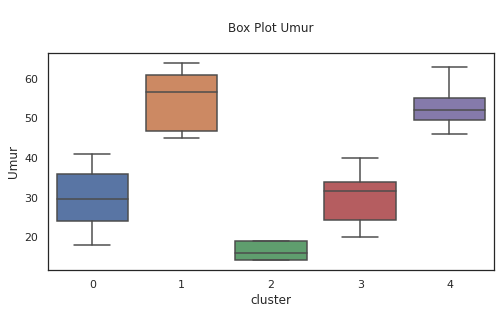

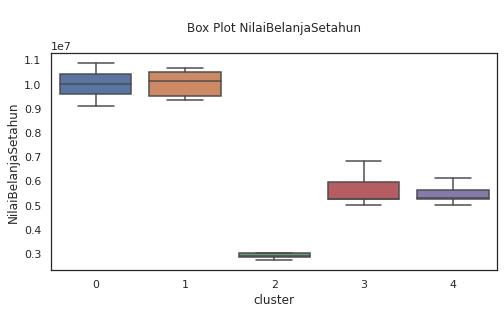

In [16]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
  plt.figure(figsize=(8,4))
  sns.boxplot(x = 'cluster',y = i, data = df_final)
  plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
  plt.show() 

In [17]:
print('Umur Rata-Rata Cluster 0: {}'.format(round(df_final['Umur'][df_final['cluster'] == 0].mean(), 0)))

Umur Rata-Rata Cluster 0: 30.0


In [18]:
print('Nilai Belanja Setahun Rata-Rata Cluster 0: {}'.format(df_final['NilaiBelanjaSetahun'][df_final['cluster'] == 0].mean()))

Nilai Belanja Setahun Rata-Rata Cluster 0: 9995179.0


### c. Visualisasi Hasil Clustering - Count Plot

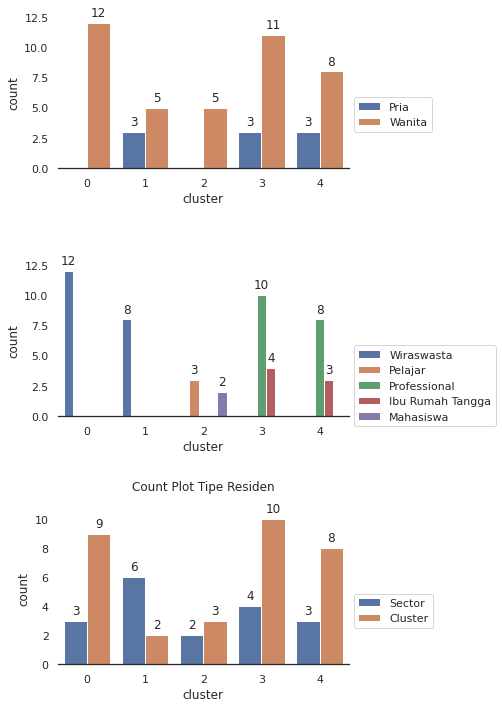

In [19]:

import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

fig, ax = plt.subplots(3,1,figsize=(7,10)) 

#plt.figure(figsize=(7,4))
for i, kol in enumerate(kolom_categorical):
  
  sns.countplot(x = 'cluster', data = df_final, hue = kol, ax = ax[i]) #hue -> legend / dipisah berdasarkan kategori
  plt.title('\nCount Plot {}\n'.format(kol), fontsize=12)
  ax[i].legend(loc="upper left", bbox_to_anchor=(1, 0.5))
	
  for p in ax[i].patches:
    ax[i].annotate(format(p.get_height(), '.0f'),
		                  (p.get_x() + p.get_width() / 2., p.get_height()),
		                  ha = 'center',
		                  va = 'center',
		                  xytext = (0, 10), # posisi text anotasi
		                  textcoords = 'offset points')
  sns.despine(right=True,top = True, left = True) #Remove Border Grafik
  plt.tight_layout()

plt.show()

## D. Menamakan Cluster


In [20]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({0: 'Diamond Young Member', #.map -> substitusi nilai
                                              1: 'Diamond Senior Member',
                                              2: 'Silver Member',
                                              3: 'Gold Young Member',
                                              4: 'Gold Senior Member',
                                              })

df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4,Gold Senior Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4,Gold Senior Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member


Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:

    1. Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta.
    Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
    
    2. Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. 
    Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
    
    3. Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

    4.Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun
    dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.
    
    5. Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang 
    berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.


# 4 - Me-Load Model Yang Sudah Kita Simpan (Buat) Untuk Data Baru

## A. Mempersiapkan Data Baru
Disini kamu membuat contoh data baru untuk di prediksi dengan model yang sudah di buat. Hal ini kamu lakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.

In [21]:
# Data Baru
data =  [{ 'Customer_ID': 'CUST-100' ,
          'Nama Pelanggan': 'Joko' ,
          'Jenis Kelamin': 'Pria',
          'Umur': 45,
          'Profesi': 'Wiraswasta',
          'Tipe Residen': 'Cluster' ,
          'NilaiBelanjaSetahun': 8230000

        }]

# Membuat Data Frame
new_df = pd.DataFrame(data)

# Melihat Data
new_df

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


## B. Membuat Fungsi Data Pemrosesan

Kita dapat menghitung nilai standardisasi (z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

In [22]:
def data_preprocess(data):

  # Konversi Kategorikal data / Label Encoder
  kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

  df_encode = data[kolom_kategorikal].copy()

  ## Jenis Kelamin
  df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({ 'Pria': 0,
                                                                'Wanita' : 1
                                                              })

  ## Profesi
  df_encode['Profesi'] = df_encode['Profesi'].map({ 'Ibu Rumah Tangga': 0,
                                                    'Mahasiswa' : 1,
                                                    'Pelajar': 2,
                                                    'Professional': 3,
                                                    'Wiraswasta': 4
                                                  })

  ## Tipe Residen
  df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({ 'Cluster': 0,
                                                              'Sector' : 1
                                                            })

  # Standardisasi Numerical Data -> rumus Z = (Nilai tiap data - Rata" data) / Standard Deviasi Data
  kolom_numerik = ['Umur','NilaiBelanjaSetahun']
  df_std = data[kolom_numerik].copy()

  ## Standardisasi Kolom Umur
  df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7 

  ## Standardisasi Kolom Nilai Belanja Setahun
  df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

  # Menggabungkan Kategorikal dan numerikal data
  df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')

  return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

new_df_model

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.510204,0.447818


## C. Memanggil Model dan Melakukan Prediksi

In [23]:
def modelling (data):

  # Memanggil Model
  kproto = pickle.load(open('cluster.pkl', 'rb'))

  # Melakukan Prediksi
  clusters = kproto.predict(data, categorical=[0,1,2])

  return clusters

# Menjalankan Fungsi
clusters = modelling(new_df_model)

print(clusters)

[1]


## D. Menamakan Cluster

In [26]:
def menamakan_segmen (data_asli, clusters):

  # Menggabungkan cluster dan data asli
  final_df = data_asli.copy()
  final_df['cluster'] = clusters

  # Menamakan segmen
  final_df['segmen'] = final_df['cluster'].map({0: 'Diamond Young Member',
                                                1: 'Diamond Senior Member',
                                                2: 'Silver Students',
                                                3: 'Gold Young Member',
                                                4: 'Gold Senior Member'
                                                })

  return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df, clusters)

new_final_df

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000,1,Diamond Senior Member
